In [31]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
import statsmodels.api as sm

In [75]:
# get and save stocks data as csv file
stocks_tickers = ['MSFT', 'GOOGL']
df = pd.DataFrame()
for label in stocks_tickers:
    stock = yf.Ticker(label)
    hist = stock.history(start = '2015-01-01', end='2016-01-01')
    df[label] = hist['Close']
df.to_csv('../Regression/stocks.csv')

In [80]:
# get X and Y (features and targets)
stocks = pd.read_csv('stocks.csv')
X = stocks['Date']
Y = stocks.drop(['Date'], axis=1)

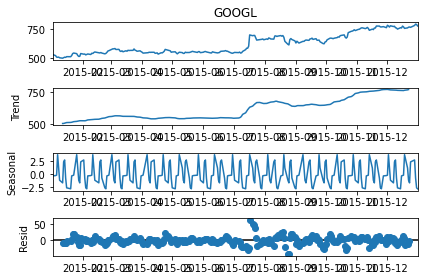

In [35]:
# Time Series Analysis
Y = df['GOOGL']
res = sm.tsa.seasonal_decompose(Y, period=12)
fig = res.plot()

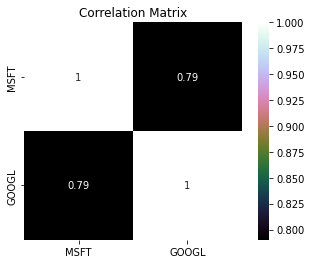

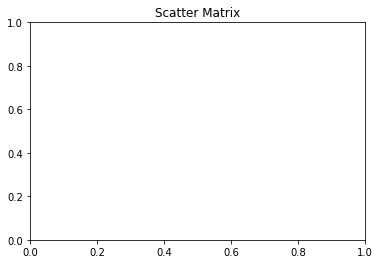

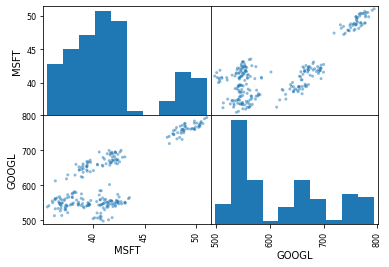

In [26]:
# data visualization
correlation = df.corr()
plt.title('Correlation Matrix')
sns.heatmap(correlation, cmap = 'cubehelix', annot=True, square=True, vmax=1)
plt.title('Scatter Matrix')
scatter_matrix(df)


In [83]:
# modules for regressions models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

# modules for model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [37]:
# model evaluation
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('MLP', MLPRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [82]:
# split data into train and test


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=420)

In [87]:
# train models
# names, kfold_results, test_results, train_results = [], [], [], []
# for name, model in models: 
#         names.append(name)
#         kfold = KFold(n_splits=10)
#         cv_results = -1*cross_val_score(model, X_train, Y_train, cv=kfold)
#         kfold_results.append(cv_results)
#         res = model.fit(X_train, Y_train)
#         train_result = mean_squared_error(res.predict(X_train), Y_train)
#         train_results.append(train_result)
#         test_result = mean_squared_error(res.predict(X_test), Y_test)
#         test_results.append(test_result)

ValueError: could not convert string to float: '2015-11-11'

In [90]:
# ARIMA model
# from statsmodels.tsa.arima_model import ARIMA
# import statsmodels.api as sm

# arima_model = ARIMA(endog=Y_train, exog=X_train, order=[1,0,0])